## Day 1: Of Numerical Integration, Python and Tensorflow

Welcome to Day 1! Today, we start with our discussion of what Numerical Integration is.

### What is Numerical Integration?

From the point of view of a theoretician, the ideal form of the solution to a differential equation given the initial conditions, i.e. an initial value problem (IVP), would be a formula for the solution function. But sometimes obtaining a formulaic solution is not always easy, and in many cases is absolutely impossible. So, what do we do when faced with a differential equation that we cannot solve? If you are only looking for long term behavior of a solution you can always sketch a direction field. This can be done without too much difficulty for some fairly complex differential equations that we can’t solve to get exact solutions. But, what if we need to determine how a specific solution behaves, including some values that the solution will take? In that case, we have to rely on numerical methods for solving the IVP such as euler's method or the Runge-Kutta Methods. 

#### Euler's Method

We use Euler's Method to generate a numerical solution to an initial value problem of the form:

$$\frac{dx}{dt} = f(x, t)$$
$$x(t_o) = x_o$$

Firstly, we decide the interval over which we desire to find the solution, starting at the initial condition. We break this interval into small subdivisions of a fixed length $\epsilon$. Then, using the initial condition as our starting point, we generate the rest of the solution by using the iterative formulas:

$$t_{n+1} = t_n + \epsilon$$
$$x_{n+1} = x_n + \epsilon f(x_n, t_n)$$

to find the coordinates of the points in our numerical solution. We end this process once we have reached the end of the desired interval.

To see a graphical and mathematical derivation of the same visit: http://calculuslab.deltacollege.edu/ODE/7-C-1/7-C-1-h-a.html

#### Euler and Python
Let $\frac{dx}{dt}=f(x,t)$, we want to find $x(t)$ over $t\in[0,2)$, given that $x(0)=1$ and $f(x,t) = 5x$. The exact solution of this equation would be $x(t) = e^{5t}$.


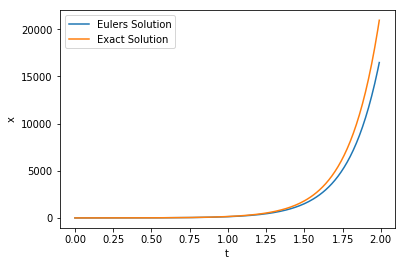

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x,t): # define the function f(x,t)
    return 5*x

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
x = np.zeros(t.shape) # define an array for x

x[0]= 1 # set initial condition

for i in range(1,t.shape[0]):
    x[i] = epsilon*f(x[i-1],t[i-1])+x[i-1] # Euler Integration Step
    
plt.plot(t,x,label="Eulers Solution")
plt.plot(t,np.exp(5*t),label="Exact Solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

#### Euler and Vectors

Euler's Method also applies to vectors and can solve simultaneous differential equations.

The Initial Value problem now becomes:

$$\frac{d\vec{x}}{dt} = \vec{f}(\vec{x}, t)$$
$$\vec{x}(t_o) = \vec{x_o}$$

where $\vec{x}=[x_1,x_2...]$ and $\vec{f}(\vec{x}, t)=[f_1(\vec{x}, t),f_2(\vec{x}, t)...]$.

The Euler's Method becomes:

$$t_{n+1} = t_n + \epsilon$$
$$\vec{x_{n+1}} = \vec{x_n} + \epsilon \vec{f}(\vec{x_n}, t_n)$$

Let $\frac{d\vec{x}}{dt}=f(\vec{x},t)$, we want to find $\vec{x}(t)$ over $t\in[0,2)$, given that $\vec{x}=[x,y]$, $\vec{x}(0)=[1,0]$ and $f(\vec{x},t) = [x-y,y-x]$.

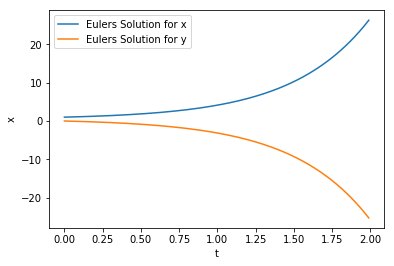

In [2]:
def f(x,t): # define the function f(x,t)
    x_,y_ = x
    return np.array([x_-y_,y_-x_])

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
x = np.zeros((2,t.shape[0])) # define an array for x

x[:,0]= [1,0] # set initial condition

for i in range(1,t.shape[0]):
    x[:,i] = epsilon*f(x[:,i-1],t[i-1])+x[:,i-1] # Euler Integration Step
    
plt.plot(t,x[0,:],label="Eulers Solution for x")
plt.plot(t,x[1,:],label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

#### A Generalized function for Euler Integration

Now, we create a generalized function that takes in 3 inputs ie. the function $f(\vec{y},t)$ when $\frac{d\vec{y}}{dt}=f(\vec{y},t)$, the time array, and initial vector $\vec{y_0}$.

##### Algorithm
- Get the required inputs: function $\vec{f}(\vec{x},t)$, initial condition vector $\vec{y_0}$ and time series $t$.
- Check if t is monotonically increasing. Entering a time series $t$ allows for greater control over $\epsilon$ as it can now vary for each timestep. The only difference in the Euler's Method is now : $\epsilon\rightarrow\epsilon(t_n)$.
- Check if the input is of the correct datatype ie. floating point decimal.
- Create a zero matrix to hold the output.
- For each timestep, perform the euler method updation with variable $\epsilon$ and store it in the output matrix.
- Return the output timeseries matrix.

In [3]:
def check_increasing(t): # Ensure Time is Monotonically Increasing
    return np.all(t[1:]>t[:-1])

def check_type(y,t): # Ensure Input is Correct
    return y.dtype == np.floating and t.dtype == np.floating

class _Integrator():
    
    def integrate(self,func,y0,t):
        time_delta_grid = t[1:] - t[:-1]
        
        y = np.zeros((y0.shape[0],t.shape[0]))
        y[:,0] = y0
        
        for i in range(time_delta_grid.shape[0]):
            y[:,i+1]= time_delta_grid[i]*func(y[:,i],t[i])+y[:,i]
        return y


def odeint_euler(func,y0,t):
    y0 = np.array(y0)
    t = np.array(t)
    if check_increasing(t) and check_type(y0,t):
        return _Integrator().integrate(func,y0,t)
    else:
        print("error encountered")

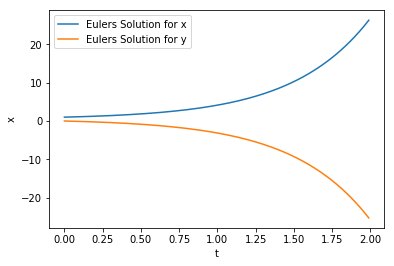

In [4]:
solution = odeint_euler(f,[1.,0.],t)

plt.plot(t,solution[0,:],label="Eulers Solution for x")
plt.plot(t,solution[1,:],label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

### An Introduction to TensorFlow

TensorFlow is an open-source software library. TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google’s Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research, but the system is general enough to be applicable in a wide variety of other domains as well!

Essentially, TensorFlow library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers. It is a python package that (much like BLAS on Intel MKL) speeds up Linear Algebra Computation. What is special about this system is that it is capable of utilizing GPUs and TPUs for computation and its written in a simpler language like python.

#### Why GPU/TPU vs CPU?

<img src="GPUvCPU.png" alt="GPUvCPU.png" width="600"/>

The answer lies in the architecture: 
**CPU = Faster per Core Processing, Slow but Large Memory Buffer, Few Cores**
**GPU/TPU = Slower Processing, Faster but Smaller Memory Buffer, Many Cores**

Thus GPUs and TPUs are optimized for large number of simple calculations done parallely. The extent of this  parallelization makes it suitable for vector/tensor manipulation.


For an Introduction to Computational Graphs in Tensorflow, Visit:
https://www.geeksforgeeks.org/introduction-to-tensorflow/

#### Euler Integration Function in TensorFlow

Transitioning to TensorFlow is not a trivial process, but once you get a gist of how it works, it is as simple as using numpy. Because of the way the TensorFlow architecture is designed, there are a few limitations to how one can do simpler operations/manipulation. But it is easy to overcome using the correct function and code patterns which can be easily learnt.

In [6]:
# Firstly, import TensorFlow

import tensorflow as tf

# TensorFlow Boolean variables are not easy to directly use for flow control.
# Thus instead of using an if statement we raise an error / use a control dependency

def tf_check_type(t, y0): # Ensure Input is Correct
    
    if not (y0.dtype.is_floating and t.dtype.is_floating): 
        # The datatype of any tensor t is accessed by t.dtype
        raise TypeError('Error in Datatype')

def tf_check_increasing(t): # Ensure Time is Monotonically Increasing
    
    assert_op = tf.Assert(tf.reduce_all(t[1:]>t[:-1]),["Time must be monotonic"])
    # Asserting a control dependency is essentially forcing a requirement
    return tf.control_dependencies([assert_op])

class _Tf_Integrator():
    
    def integrate(self, func, y0, t): 
        
        time_delta_grid = t[1:] - t[:-1]  
        
        # tf.scan(fn,el,init) is an iterator over elems, it applies fn recursively on tensor init
        # fn is function takes in two inputs: accumulated fn and the value of current iteration on el
        # it must return an output structurally identical to the input to fn to allow recursion
        # the values of el (here time and delta time) act as additional information over recursion
        
        scan_func = self._make_scan_func(func)
        
        # iterate over (t,dt) till the 2nd last iteration
        
        y = tf.scan(scan_func, (t[:-1], time_delta_grid),y0) 
        return tf.concat([[y0], y], axis=0)
    
    def _make_scan_func(self, func): # create and return a stepper function fn
        def scan_func(y, t_dt): 
            t, dt = t_dt
            dy = dt*func(y,t)
            dy = tf.cast(dy, dtype=y.dtype) # Cast to correct type as failsafe
            return y + dy
        return scan_func
    

def tf_odeint_euler(func, y0, t):
    
    # Convert input to TensorFlow Objects
    
    t = tf.convert_to_tensor(t, preferred_dtype=tf.float64, name='t')
    y0 = tf.convert_to_tensor(y0, name='y0')
    tf_check_type(y0,t)
    with tf_check_increasing(t):
        return _Tf_Integrator().integrate(func,y0,t)

In [9]:
# Define a function using Tensorflow math operations. This creates a computational graph.

def f(X,t):
    x = X[:-1]
    y = X[1:]
    out = tf.concat([x-y,y-x],0)
    return out

y0 = tf.constant([1,0], dtype=tf.float64)

epsilon = 0.01
t = np.arange(0,2,epsilon)

# Define the final value (output of scan) that we wish to compute as a variable

state = tf_odeint_euler(f,y0,t)

# Start a TF session and evaluate state
with tf.Session() as sess:
    state = sess.run(state)

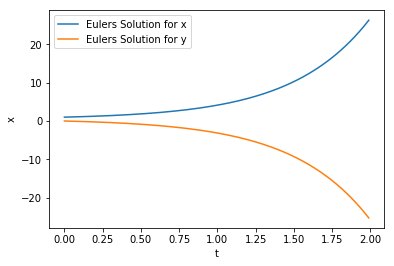

In [10]:
plt.plot(t,state.T[0,:],label="Eulers Solution for x")
plt.plot(t,state.T[1,:],label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()